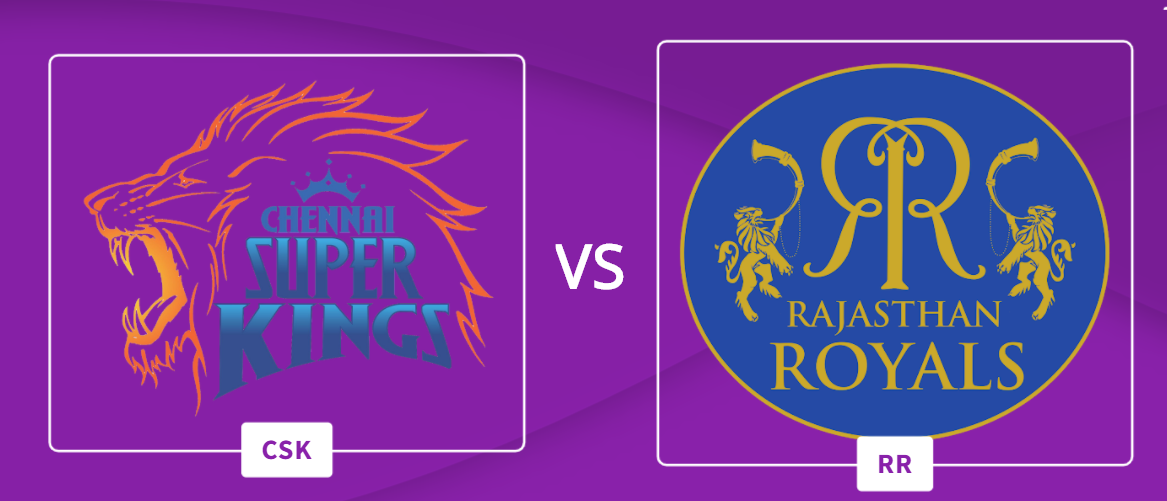

In [280]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

pd.set_option('display.max_columns', 50)

In [281]:
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")

In [282]:
CSK_batsmen = ['S Curran', 'F du Plessis','SR Watson', 'AT Rayudu', 'MS Dhoni', 'RA Jadeja', 'DJ Bravo']
CSK_bowlers = ['DL Chahar', 'S Curran','SN Thakur', 'PP Chawla', 'RA Jadeja', 'DJ Bravo', 'KV Sharma']

# Bowlers of RR
#K Tyagi : 1st IPL
RR_bowlers = ['J Archer' ,'S Gopal' , 'JD Unadkat', 'BA Stokes', 'R Tewatia']
RR_batsmen = ['BA Stokes','JC Buttler', 'SPD Smith', 'RV Uthappa', 'SV Samson', 'R Tewatia', 'R Parag']

################################################################################################################################
# Question 3: What will be Deepak Chahar's Economy Rate?
################################################################################################################################

## 3.1 
### DL Chahar's Economy rate in IPL
#### 1. Overall
#### 2. in power play
#### 3. in mid overs
#### 4. in death overs
#### 5. against RR batsmen playing in power play
#### 6. against RR batsmen playing in mid overs
#### 7. against RR batsmen playing in death overs

In [283]:
IPL_data = pd.merge(deliveries, matches[['id','season', 'team1', 'team2', 'toss_winner', 'toss_decision','winner','result', 'dl_applied','win_by_runs','win_by_wickets', 'venue' ]], 
                    left_on='match_id', right_on='id')

# calculating economy of Deepak Chahar
IPL_data_DC = IPL_data[IPL_data.bowler == "DL Chahar"]
IPL_data_DC_PP = IPL_data_DC[IPL_data_DC.over <= 6]
IPL_data_DC_MO = IPL_data_DC[(IPL_data_DC.over >= 6) & ((IPL_data_DC.over <= 15))]
IPL_data_DC_DO = IPL_data_DC[IPL_data_DC.over > 15]

# overall


# power play
bowling_runs1 = IPL_data_DC_PP.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls1 = IPL_data_DC_PP.groupby('bowler').count()
bowled_balls1 = bowling_balls1['ball'].reset_index(name='Balls Bowled')
bowler_stats1 = pd.merge(bowling_runs1, bowled_balls1, left_on='bowler',right_on='bowler',how='outer')
bowler_stats["economy_rate_powerplay"] = (bowler_stats1['Runs Conceeded']/bowler_stats1['Balls Bowled'])*6


# mid overs
bowling_runs2 = IPL_data_DC_MO.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls2 = IPL_data_DC_MO.groupby('bowler').count()
bowled_balls2 = bowling_balls2['ball'].reset_index(name='Balls Bowled')
bowler_stats2 = pd.merge(bowling_runs2,bowled_balls2,left_on='bowler',right_on='bowler',how='outer')
bowler_stats["economy_rate_mid_overs"] = (bowler_stats2['Runs Conceeded']/bowler_stats2['Balls Bowled'])*6

# death overs
bowling_runs3 = PL_data_DC_DO.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls3 = PL_data_DC_DO.groupby('bowler').count()
bowled_balls3 = bowling_balls3['ball'].reset_index(name='Balls Bowled')
bowler_stats3 = pd.merge(bowling_runs3, bowled_balls3,left_on='bowler',right_on='bowler',how='outer')
bowler_stats["economy_rate_death_overs"] = (bowler_stats3['Runs Conceeded']/bowler_stats3['Balls Bowled'])*6
#############################################################################################################################
# Aganst CSK batsmen
IPL_data_DL_RR = IPL_data_DC[IPL_data_DC.batsman.isin(RR_batsmen)]

#  in power play
IPL_data_DL_RR_PP = IPL_data_DL_RR[IPL_data_DL_RR.over <= 6]

#  in mid overs (most probable)
IPL_data_DL_RR_MO = IPL_data_DL_RR[(IPL_data_DL_RR.over >= 6) & (IPL_data_DL_RR.over <= 15)]

#  in death overs
IPL_data_DL_RR_DO = IPL_data_DL_RR[IPL_data_DL_RR.over >= 16]

# overall
bowling_runs_ = IPL_data_DL_RR.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls_ = IPL_data_DL_RR.groupby('bowler').count()
bowled_balls_ = bowling_balls_['ball'].reset_index(name='Balls Bowled')
bowler_stats_ = pd.merge(bowling_runs_,bowled_balls_,left_on='bowler',right_on='bowler',how='outer')
bowler_stats_["economy_rate_overall_against_RR"] = (bowler_stats_['Runs Conceeded']/bowler_stats_['Balls Bowled'])*6

# power play
bowling_runs1_ = IPL_data_DL_RR_PP.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls1_ = IPL_data_DL_RR_PP.groupby('bowler').count()
bowled_balls1_ = bowling_balls1_['ball'].reset_index(name='Balls Bowled')
bowler_stats1_ = pd.merge(bowling_runs1_, bowled_balls1_, left_on='bowler',right_on='bowler',how='outer')
bowler_stats_["economy_rate_powerplay_against_RR"] = (bowler_stats1_['Runs Conceeded']/bowler_stats1_['Balls Bowled'])*6


# mid overs
bowling_runs2_ = IPL_data_DL_RR_MO.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls2_ = IPL_data_DL_RR_MO.groupby('bowler').count()
bowled_balls2_ = bowling_balls2_['ball'].reset_index(name='Balls Bowled')
bowler_stats2_ = pd.merge(bowling_runs2_,bowled_balls2_,left_on='bowler',right_on='bowler',how='outer')
bowler_stats_["economy_rate_mid_overs_against_RR"] = (bowler_stats2_['Runs Conceeded']/bowler_stats2_['Balls Bowled'])*6

# death overs
bowling_runs3 = IPL_data_DL_RR_DO.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls3 = IPL_data_DL_RR_DO.groupby('bowler').count()
bowled_balls3 = bowling_balls3['ball'].reset_index(name='Balls Bowled')
bowler_stats3 = pd.merge(bowling_runs3, bowled_balls3,left_on='bowler',right_on='bowler',how='outer')
bowler_stats["economy_rate_death_overs_against_RR"] = (bowler_stats3['Runs Conceeded']/bowler_stats3['Balls Bowled'])*6


In [284]:
print("details of economy rate of DL Chahar in general in IPL")
bowler_stats[['economy_rate_overall', 'economy_rate_powerplay', 'economy_rate_mid_overs', 'economy_rate_death_overs']]

details of economy rate of DL Chahar in general in IPL


,economy_rate_overall,economy_rate_powerplay,economy_rate_mid_overs,economy_rate_death_overs
0,7.607143,7.609508,8.112,8.338983


In [285]:
print("details of economy rate of DL Chahar in general in IPL against RR Batsmen")
bowler_stats_[['economy_rate_overall_against_RR','economy_rate_powerplay_against_RR', 'economy_rate_mid_overs_against_RR']]


details of economy rate of DL Chahar in general in IPL against RR Batsmen


,economy_rate_overall_against_RR,economy_rate_powerplay_against_RR,economy_rate_mid_overs_against_RR
0,8.086957,8.421053,9.176471


## 3.2
### Let's calculate Economy rate of DL Chahar against specific players of RR

In [286]:
# runs conceded matchwise, overwise
br_ = IPL_data_DL_RR.groupby(['match_id','batsman','over']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
br_

# balls bowled matchwise, overwise
bb_ = IPL_data_DL_RR.groupby(['match_id','batsman','over']).count()
bb_ = bb_['ball'].reset_index(name='Balls Bowled')

# Calculating economy rate maychwise overwise
bs_ = pd.merge(br_,bb_,left_on=['match_id','batsman','over'],right_on=['match_id','batsman','over'],how='outer')
bs_["economy_rate"] = (bs_['Runs Conceeded']/bs_['Balls Bowled'])*6
bs_

,match_id,batsman,over,Runs Conceeded,Balls Bowled,economy_rate
0,2,JC Buttler,2,8,6,8.0
1,2,JC Buttler,6,12,5,14.4
2,9,SV Samson,2,10,4,15.0
3,9,SV Samson,4,9,6,9.0
4,9,SV Samson,6,1,1,6.0
5,7910,BA Stokes,5,2,4,3.0
6,7910,BA Stokes,7,2,3,4.0
7,7910,JC Buttler,5,1,1,6.0
8,7910,JC Buttler,7,8,5,9.6
9,7910,SV Samson,3,2,2,6.0


#### from above data it is clear that DL chahar has bowled  mostly in over 1-7 and in over 19 in just 1 match against CSK batsmen

In [287]:
fig = px.bar(bs_, x=bs_.index, y='economy_rate',
             hover_data=['match_id','batsman','over','Runs Conceeded','Balls Bowled'], color='batsman',title='Economy rate of DL Chahar against RR batsmen')
fig.show()

fig = px.bar(bs_, x="over", y='economy_rate',
             hover_data=['match_id','batsman','over','Runs Conceeded','Balls Bowled'], color='batsman',title='Economy rate of DL Chahar against RR batsmen Overwise')
fig.show()

## 3.3
### lets us calculate average economy playerwise

In [288]:
#RR Batsmen in power play['BA Stokes','JC Buttler', 'SPD Smith']
#RR batsmen in mid overs ['SPD Smith', 'RV Uthappa', 'SV Samson']
#RR batsmen in death overs['SV Samson', 'R Tewatia', 'R Parag']

bs_DL = bs_.groupby(["match_id","batsman"])['Runs Conceeded','Balls Bowled'].sum().reset_index()
bs_DL["economy_rate"] = (bs_DL['Runs Conceeded']/bs_DL['Balls Bowled'])*6
fig = px.bar(bs_DL, x=bs_DL.index, y='economy_rate',
             hover_data=['match_id','batsman','Runs Conceeded','Balls Bowled'], color='batsman',title='Economy rate of DL Chahar against RR batsmen matchwise')
fig.show()

# average economy rate against each batsman
bs_DL_ = bs_.groupby(["batsman"])['Runs Conceeded','Balls Bowled'].sum().reset_index()
bs_DL_["economy_rate"] = (bs_DL_['Runs Conceeded']/bs_DL_['Balls Bowled'])*6

fig = px.bar(bs_DL_, x="batsman", y='economy_rate',
             hover_data=['batsman','Runs Conceeded','Balls Bowled'], color='batsman',title='Average Economy rate of DL Chahar against RR batsmen')
fig.show()
bs_DL_

,batsman,Runs Conceeded,Balls Bowled,economy_rate
0,BA Stokes,4,8,3.000000
1,JC Buttler,41,26,9.461538
2,RV Uthappa,8,4,12.000000
3,SPD Smith,8,9,5.333333
4,SV Samson,32,22,8.727273


In [289]:
DL_er =  ((bs_DL_['Runs Conceeded'].sum())/(bs_DL_['Balls Bowled'].sum()))*6
print("Average economy rate of DL chahar against all RR Batsmen is :", DL_er)

Average economy rate of DL chahar against all RR Batsmen is : 8.08695652173913


## Conclusion: Economy of Chahar will be in between 7.31 - 8.2

###############################################################################################################################
# Question 2 : How many Runs will RR Score in 6 overs?
###############################################################################################################################


## 2.1
### How many runs the batsmen of RR(in powerplay) score in general.

In [290]:
RR = IPL_data[(IPL_data.batsman.isin(RR_batsmen)) &  (IPL_data.over <=6)]
powerplay_RR = RR.groupby(['match_id','batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")
powerplay_RR_ = RR.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index(name = "total_runs_powerplay")
powerplay_RR["total_runs_powerplay"] = powerplay_RR_.total_runs_powerplay
fig = px.bar(powerplay_RR, x=powerplay_RR.index, y='total_runs_powerplay',
             hover_data=['match_id','batsman','balls_faced','total_runs_powerplay'], color='batsman',
             width = 1000, height = 400,title='Runs by RR batsme in powerplay matchwise by each RR batsman')
fig.show()

# Matchwise runs  
powerplay_RR_t = powerplay_RR.groupby(["match_id"])["total_runs_powerplay"].sum().reset_index()
fig = px.bar(powerplay_RR_t, x=powerplay_RR_t.index, y='total_runs_powerplay',
             hover_data=['match_id','total_runs_powerplay'], color='total_runs_powerplay',
             width = 1000, height = 400,title='total runs in powerplay matchwise (combined all RR batsmen)')
fig.show()

# powerplay batsmen of RR are : 'BA Stokes','JC Buttler', 'SPD Smith'
pp_rr = ['BA Stokes','JC Buttler', 'SPD Smith']
powerplay_RR1 = powerplay_RR[powerplay_RR.batsman.isin(pp_rr)]
powerplay_RR1_ = powerplay_RR1.groupby(['match_id'])['total_runs_powerplay'].sum().reset_index()
fig = px.bar(powerplay_RR1_, x=powerplay_RR1_.index, y='total_runs_powerplay',
             hover_data=['match_id','total_runs_powerplay'], color='total_runs_powerplay',
             width = 1000, height = 400,title='total runs in powerplay matchwise by stokes, buttler and smith')
fig.show()
print("Stokes, Buttler and , Smith :\n",powerplay_RR1_.total_runs_powerplay.describe(), "\n\nAll RR batsmen\n", powerplay_RR_t.total_runs_powerplay.describe())

Stokes, Buttler and , Smith :
 count    64.00000
mean     16.71875
std      15.11172
min       0.00000
25%       4.75000
50%      13.00000
75%      28.00000
max      68.00000
Name: total_runs_powerplay, dtype: float64 

All RR batsmen
 count    222.000000
mean      15.959459
std       12.597607
min        0.000000
25%        5.000000
50%       13.000000
75%       24.000000
max       68.000000
Name: total_runs_powerplay, dtype: float64


## 2.2 
### performace against CSK bowlers

In [291]:
RR_CSK = RR[RR.bowler.isin(CSK_bowlers)]
powerplay_RR_ = RR_CSK.groupby(['match_id','batsman','bowler'])['batsman_runs'].count().reset_index(name = "balls_faced")
powerplay_RR_1 = RR_CSK.groupby(['match_id','batsman', 'bowler'])['batsman_runs'].sum().reset_index(name = "total_runs_powerplay")
powerplay_RR_["total_runs_powerplay"] = powerplay_RR_1.total_runs_powerplay
fig = px.bar(powerplay_RR_, x=powerplay_RR_.index, y='total_runs_powerplay',
             hover_data=['match_id','batsman','balls_faced','total_runs_powerplay', 'bowler'], color='batsman',
             width = 1000, height = 400,title='Runs conceeded by CSK bowlers in powerplay against RR batsmen match wise')
fig.show()
# Bowlerwise runs in powerplay
powerplay_RR_bowlerwise = powerplay_RR_.groupby(['match_id','bowler'])['total_runs_powerplay'].sum().reset_index()
fig = px.bar(powerplay_RR_bowlerwise, x=powerplay_RR_bowlerwise.index, y='total_runs_powerplay',
             hover_data=['match_id','total_runs_powerplay', 'bowler'], color='bowler',
             width = 1000, height = 400,title='Runs conceeded by CSK bowlers matchwise in powerplay')
fig.show()
powerplay_RR_bowlerwise_ = powerplay_RR_.groupby(['bowler'])['balls_faced','total_runs_powerplay'].sum().reset_index()
powerplay_RR_bowlerwise_["economy_rate"] = (powerplay_RR_bowlerwise_.total_runs_powerplay/powerplay_RR_bowlerwise_.balls_faced)*6
powerplay_RR_bowlerwise_

,bowler,balls_faced,total_runs_powerplay,economy_rate
0,DL Chahar,57,78,8.210526
1,KV Sharma,17,11,3.882353
2,PP Chawla,15,10,4.000000
3,RA Jadeja,29,35,7.241379
4,S Curran,5,18,21.600000
5,SN Thakur,40,51,7.650000


In [292]:
# DJ bravo also bowls in Powerplay
#DJ bravo economy rate in powerplay
IPL_data_DC = IPL_data[(IPL_data.bowler == "DJ Bravo") &(IPL_data.over <=6)]
DJ = IPL_data_DC.groupby(['bowler'])['batsman_runs'].count().reset_index(name = "balls_faced")
DJ_ = IPL_data_DC.groupby(['bowler'])['batsman_runs'].sum().reset_index(name = "runs_scored")
DJ["total_runs"] = DJ_.runs_scored
DJ["economy_rate"] = (DJ.total_runs/DJ.balls_faced)*6


# Cobinations
# 1) DL Chahar + Jadeja + Thakur (2overs each)
comb1 = ((8.21 *12)/6) + ((7.24 *12)/6) + ((7.65 *12)/6)

#2) DL Chahar + Jadeja + Chawala
comb2  = ((8.21 *12)/6) + ((7.24 *12)/6) + ((4 *12)/6)

#3) DL Chahar + Jadeja + KV Sharma
comb3 = ((8.21 *12)/6) + ((7.24 *12)/6) + ((3.88 *12)/6)

#4) DL Chahar + SN Thakur + KV Sharma
comb4 = ((8.21 *12)/6) + ((7.65 *12)/6) + ((3.88 *12)/6)

#5) DL Chahar + SN Thakur + DJ Bravo
comb5 = ((8.21 *12)/6) + ((7.65 *12)/6) + ((DJ.economy_rate[0] *12)/6)

#6) DL Chahar + SN Thakur + DJ Bravo
comb6 = ((8.21 *12)/6) + ((7.65 *12)/6) + ((DJ.economy_rate[0] *12)/6)

print("Combinations of bowling in powerplay")
print("DL Chahar + Jadeja + Thakur : ", comb1)
print("DL Chahar + Jadeja + Chawala : ", comb2)
print("DL Chahar + Jadeja + KV Sharmar : ", comb3)
print("DL Chahar + SN Thakur + KV Sharma : ", comb4)
print("DL Chahar + SN Thakur + DJ Bravo: ", comb5)



Combinations of bowling in powerplay
DL Chahar + Jadeja + Thakur :  46.2
DL Chahar + Jadeja + Chawala :  38.9
DL Chahar + Jadeja + KV Sharmar :  38.66
DL Chahar + SN Thakur + KV Sharma :  39.480000000000004
DL Chahar + SN Thakur + DJ Bravo:  45.91130434782609


## Conclusion:  hence, from above analysis RR will score more than 38 runs in this match against CSK

#########################################################################################################################
# Question 4: How many wickets will J Archer take in Death overs?
#########################################################################################################################

###  J Archer wickets in death over in IPL

In [293]:
JA = IPL_data[(IPL_data.bowler == "J Archer") & (IPL_data.over >=16)]
JA.player_dismissed.fillna(0,inplace =True)
JA_w = JA[["match_id","player_dismissed","dismissal_kind"]]
JA_w_ = JA_w[JA_w.player_dismissed != 0]
JA_w_["wicket"] = "Player_dismissed"
JA_w_death = JA_w_.groupby(['match_id'])['wicket'].count().reset_index(name = "wickets_by_Archer")
fig = px.bar(JA_w_death, x=JA_w_death.index, y='wickets_by_Archer',
             hover_data=['match_id','wickets_by_Archer'], color='wickets_by_Archer',
             width = 1000, height = 400,title='Wickets by J Archer in death overs ')
fig.show()

# Wickets against CSK batsmen in death overs
JA_csk = JA[JA.batsman.isin(CSK_batsmen)]
JA_w_ = JA_csk[["match_id","player_dismissed","dismissal_kind"]]
JA_w_1 = JA_w_[JA_w_.player_dismissed != 0]
JA_w_1["wicket"] = "Player_dismissed"
print("wickets by J Archer in deaths against CSK batsmen\n\n", JA_w_1.head())

print("############################################################################################################")
print("\nPerformance stats for number of wickets taken by J Archer in Deaths are\n",JA_w_death.wickets_by_Archer.describe())
print("############################################################################################################")
print("frequent Wickets taken by J Archer in death over : ", JA_w_death.wickets_by_Archer.mode().max())

wickets by J Archer in deaths against CSK batsmen

         match_id player_dismissed dismissal_kind            wicket
167552     11148         DJ Bravo         caught  Player_dismissed
############################################################################################################

Performance stats for number of wickets taken by J Archer in Deaths are
 count    8.000000
mean     1.750000
std      0.886405
min      1.000000
25%      1.000000
50%      1.500000
75%      2.250000
max      3.000000
Name: wickets_by_Archer, dtype: float64
############################################################################################################
frequent Wickets taken by J Archer in death over :  1


## Conclusion : J Archer will take 1 - 2 wickets in Death over today, but most probably 1

# Question 5: What will be SPD Smith's(RR) strike rate during the match?

## 5.1
### Strike rate in IPL overall

In [294]:
# in general/ overall IPL performance (matchwise strike rate of SPD Smith in IPL)
batting_ings_g = IPL_data.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
SPD = batting_ings_g[batting_ings_g.batsman == "SPD Smith"]
batsman_ball_faced_g = IPL_data.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance_g = pd.merge(SPD,batsman_ball_faced_g,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance_g['Strike Rate for Match']=batsmen_performance_g['Innings Runs']*100/batsmen_performance_g['Balls Faced']

fig = px.bar(batsmen_performance_g, x=batsmen_performance_g.index, y='Strike Rate for Match',
             hover_data=['match_id','Innings Runs', 'Balls Faced'], color='match_id',
             width = 1000, height = 400,title='Strike rate of SPD Smith in IPL Matchwise')
fig.show()
print("Average strike rate of SPD smith is: ", (( ( batsmen_performance_g['Innings Runs'].sum() ) *100 ))/(batsmen_performance_g['Balls Faced'].sum()))

Average strike rate of SPD smith is:  126.67079207920793


## 5.2
### Strike rate against CSK bowlers

In [295]:
# Strike rate of SPD Smith against CSK bowlers matchwise
SPD_CSK_b  = IPL_data[(IPL_data.batsman == "SPD Smith") & (IPL_data.bowler.isin(CSK_bowlers))]
batting_ings_g1 = SPD_CSK_b.groupby(['match_id','bowler']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')

batsman_ball_faced_g1 = SPD_CSK_b.groupby(['match_id','bowler']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
                                                           
batsmen_performance_g1 = pd.merge(batting_ings_g1 , batsman_ball_faced_g1,how='inner',left_on=['match_id','bowler'],right_on=['match_id','bowler'])
batsmen_performance_g1['Strike Rate for Match'] = batsmen_performance_g1['Innings Runs']*100/batsmen_performance_g1['Balls Faced']
fig = px.bar(batsmen_performance_g1, x=batsmen_performance_g1.index, y='Strike Rate for Match',
             hover_data=['match_id','Innings Runs', 'Balls Faced'], color='bowler',
             width = 1000, height = 400,title='Strike rate of SPD Smith against CSK bowlers matchwise')
fig.show()

# Average strike rate against each bowler
batsmen_performance_g1_avg = batsmen_performance_g1.groupby(["bowler"])['Balls Faced'].sum().reset_index()
temp = batsmen_performance_g1.groupby(["bowler"])['Innings Runs'].sum().reset_index()
batsmen_performance_g1_avg["Innings Runs"] = temp['Innings Runs']
batsmen_performance_g1_avg["strike_rate_of_smith"] = batsmen_performance_g1_avg['Innings Runs']*100/batsmen_performance_g1_avg['Balls Faced']

fig = px.bar(batsmen_performance_g1_avg, x = "bowler", y='strike_rate_of_smith',
             hover_data=['Innings Runs', 'Balls Faced'], color='strike_rate_of_smith',
             width = 1000, height = 400,title='Overall Strike rate of SPD Smith against CSK bowlers')
fig.show()
batsmen_performance_g1_avg

,bowler,Balls Faced,Innings Runs,strike_rate_of_smith
0,DJ Bravo,45,66,146.666667
1,DL Chahar,9,8,88.888889
2,KV Sharma,49,57,116.326531
3,PP Chawla,32,31,96.875000
4,RA Jadeja,59,52,88.135593
5,S Curran,8,15,187.500000
6,SN Thakur,5,9,180.000000


In [296]:
print("Average Strike rate of SPD Smith against CSK bowlers is: ",((batsmen_performance_g1_avg['Innings Runs'].sum())*100)/batsmen_performance_g1_avg['Balls Faced'].sum())

Average Strike rate of SPD Smith against CSK bowlers is:  114.97584541062803


## Conclusion:<br> Hence from above analysis Strike rate of SPD Smith will be in between 115 -126

# Question 1: Who will win the match

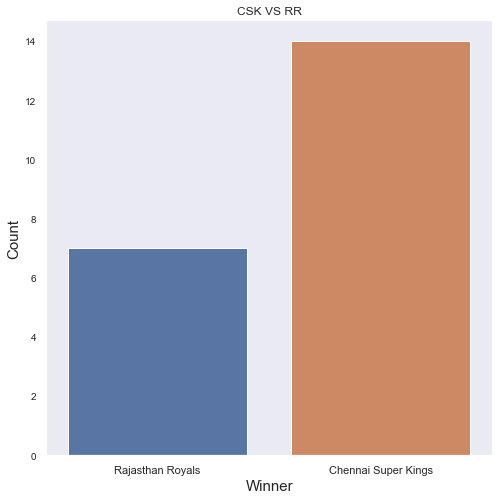

In [297]:
match_CE = matches[((matches.team1 == "Chennai Super Kings") &(matches.team2 == "Rajasthan Royals")) | ((matches.team2 == "Chennai Super Kings") &(matches.team1 == "Rajasthan Royals"))]
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(8,8)

sns.countplot(x="winner",data=match_CE)
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=10)
plt.title('CSK VS RR')
plt.show()

In [298]:
venue_CSK_RR = 'Sheikh Zayed Stadium'
#venuewise CSK
match_CSK = matches[(matches.venue == venue_CSK_RR) & ((matches.team1 == "Chennai Super Kings") | (matches.team2 == "Chennai Super Kings"))]
match_CSK

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
459,460,2014,Abu Dhabi,2014-04-18,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN
464,465,2014,Abu Dhabi,2014-04-21,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN


#### Chennai won 1 match at this stadium out of 2 matches played

In [299]:
#venuewise RR
match_RR = matches[(matches.venue == venue_CSK_RR) & ((matches.team1 == "Rajasthan Royals") | (matches.team2 == "Rajasthan Royals"))]
match_RR

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
460,461,2014,Abu Dhabi,2014-04-18,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium,BF Bowden,RK Illingworth,NaN
470,471,2014,Abu Dhabi,2014-04-26,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,PV Tambe,Sheikh Zayed Stadium,HDPK Dharmasena,C Shamshuddin,NaN
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN


#### Rajasthan Royals won all the matches that it played here

## From this basic analysis Rajasthan Royals might win today's match